In [2]:
import pandas as pd
import numpy as np
import os 
import warnings 
warnings.filterwarnings('ignore')



from datetime import datetime
from IPython.display import Image

import pandas_gbq
project_id = "annapractice"


wd = os.getcwd()
folder = wd + '/SQL Exercises'
print(folder)



/Users/annadudek/00_DataMasked/SQL Exercises


### Exercise One

Excercise: https://product-data-science.datamasked.com/courses/496549/lectures/9147553

Requirements: For each user_id, find the difference between the last action and the second last action.


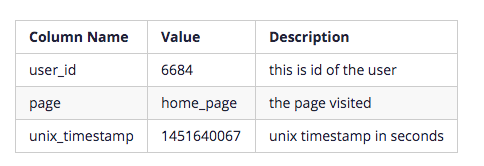

In [17]:
print(f"Excercise: https://product-data-science.datamasked.com/courses/496549/lectures/9147553")

## get dataset and fix unix
ex_one = pd.read_csv(folder + '/query_one.csv')
ex_one['date'] = pd.to_datetime(ex_one.unix_timestamp,unit='s')

## upload the dataset to GBQ
table_id = 'sql_practice.ex_one'
pandas_gbq.to_gbq(ex_one, table_id, project_id=project_id)


print('')
print('Requirements: For each user_id, find the difference between the last action \
and the second last action.')

Image(filename=folder + '/query_one_table.png')

In [ ]:
# SELECT user_id
# , MIN(unix_timestamp) as first_visit
# , MAX(unix_timestamp) as most_recent_visit
# , ZEROIFNULL(DATEDIFF('day', first_visit, most_recent_vist)) as time_diff
# FROM t1
# WHERE time_diff IS NOT NULL

"""
SELECT user_id 
,CASE WHEN visit_rank = 1 THEN unix_timestamp END AS last_visit
,CASE WHEN visit_rank = 2 THEN unix_timestamp END AS second_last_visit
, date_diff('days', second_last_visit, last_visit) as time_diff
FROM (

    SELECT user_id
    , unix_timestamp
    , RANK() OVER (PARTITION BY user_id ORDER BY unix_timestamp DESC) as visit_rank
    FROM t1)
WHERE second_last_visit IS NOT NULL 
"""

""""
SELECT 
*
, DATE_DIFF('day', date, subsequent_visit) as time_diff
FROM (
    SELECT user_id
    , date
    , RANK() OVER (PARTITION BY user_id ORDER BY date ASC) as visit_rank
    , LAG(date, 1) OVER (PARTITION BY user_id ORDER BY date DESC) as subsequent_visit 
    FROM sql_practice.ex_one) 
WHERE visit_rank = 1
AND subsequent_visit IS NOT NULL 
""""

### Exercise Two 

Excercise: https://product-data-science.datamasked.com/courses/496549/lectures/9147587
ex_two_web shape : 2021
ex_two_mobile shape : 2979


1it [00:04,  4.05s/it]
1it [00:05,  5.77s/it]


Requirements: Write a query that returns the percentage of users who only visited mobile,only web and both. That is, the percentage of users who are only in the mobile table, only in the web table and in both tables. The sum of the percentages should return 1.


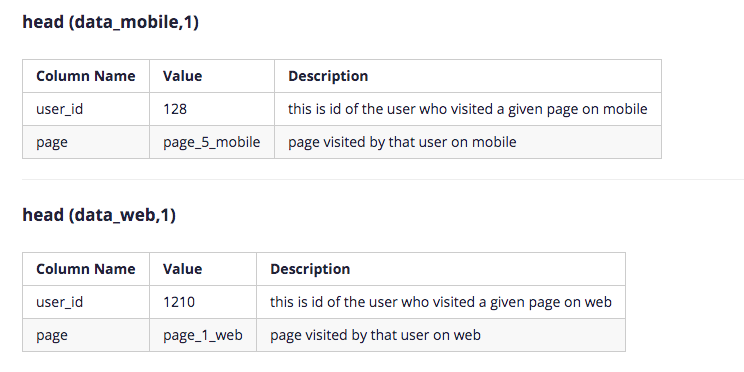

In [49]:
print(f"Excercise: https://product-data-science.datamasked.com/courses/496549/lectures/9147587")

## get dataset and fix unix
ex_two_web = pd.read_csv(folder + '/query_two_web.csv')
ex_two_mobile = pd.read_csv(folder + '/query_two_mobile.csv')

print(f"ex_two_web shape : {len(ex_two_web)}")
print(f"ex_two_mobile shape : {len(ex_two_mobile)}")

## upload the dataset to GBQ
table_id = 'sql_practice.ex_two_web'
pandas_gbq.to_gbq(ex_two_web, table_id, project_id=project_id)

table_id = 'sql_practice.ex_two_mobile'
pandas_gbq.to_gbq(ex_two_mobile, table_id, project_id=project_id)


print('')
print('Requirements: Write a query that returns the percentage of users who only visited mobile,\
only web and both. That is, the percentage of users who are only in the mobile table, only in the web \
table and in both tables. The sum of the percentages should return 1.')

Image(filename=folder + '/query_two_table.png')


Requirements: Write a query that returns the percentage of users who only visited mobile,only web and both. That is, the percentage of users who are only in the mobile table, only in the web table and in both tables. The sum of the percentages should return 1.


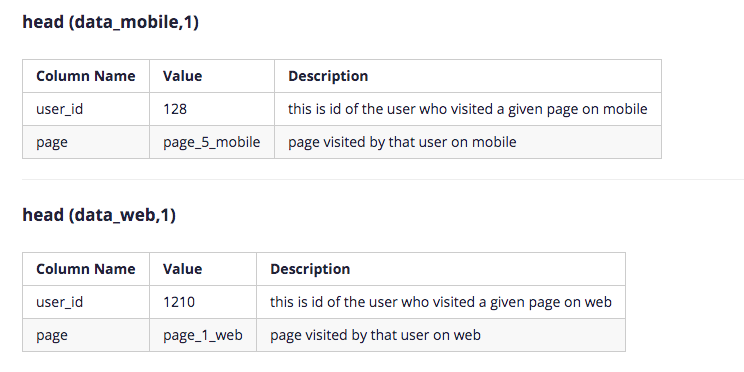

In [43]:
"""
SELECT COUNT (*) as total_users
  , COUNT (DISTINCT mobile_user_id) as mobile_users
  , COUNT (DISTINCT web_user_id)  as web_users
  , SUM(CASE WHEN mobile_user_id IS NULL OR web_user_id IS NULL THEN 0 ELSE 1 END) as both_users
  
  ,(ROUND((mobile_users/total_users),2))*100 as pct_mobile_users 
  ,(ROUND((web_users/total_users),2))*100 as pct_web_users
  ,(ROUND((both_users/total_users),2))*100 as pct_both_users
  FROM (
      SELECT 
      m.user_id as mobile_user_id
      ,w.user_id as web_user_id 
      FROM (SELECT DISTINCT user_id FROM sql_practice.ex_two_mobile) m
      FULL OUTER JOIN (SELECT DISTINCT user_id FROM sql_practice.ex_two_web) w
          ON w.user_id = m.user_id)
  
  """

### Exercise Three 

Excercise: https://product-data-science.datamasked.com/courses/496549/lectures/9147602
ex_three shape : 20000


1it [00:07,  7.44s/it]


Requirements: We define as power users those users who bought at least 10 products.Write a query that returns for each user on which day they became a power user. That is, for each user,on which day they bought the 10th item.


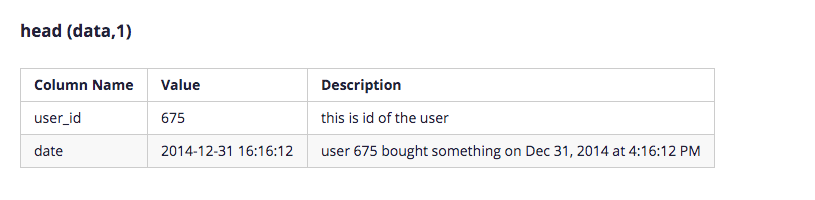

In [55]:
print(f"Excercise: https://product-data-science.datamasked.com/courses/496549/lectures/9147602")

## get dataset and fix unix
ex_three = pd.read_csv(folder + '/query_three.csv')
print(f"ex_three shape : {len(ex_three)}")

## upload the dataset to GBQ
table_id = 'sql_practice.ex_three'
pandas_gbq.to_gbq(ex_three, table_id, project_id=project_id)

print('')
print('Requirements: We define as power users those users who bought at least 10 products.\
Write a query that returns for each user on which day they became a power user. That is, for each user,\
on which day they bought the 10th item.')

Image(filename=folder + '/query_three_table.png')


In [ ]:
SELECT user_id
,date as date_become_power_user
    FROM (
    SELECT user_id 
    ,date
    ,RANK() OVER (PARTITION BY user_id ORDER BY date) as order_rank
        FROM sql_practice.ex_three)
        WHERE order_rank = 10 

### Exercise Four

Excercise: https://product-data-science.datamasked.com/courses/496549/lectures/9147602
ex_three shape : 10000
ex_three shape : 12000


1it [00:04,  4.24s/it]
1it [00:03,  3.10s/it]


Requirements: Write a query that returns the total amount of money spent by each user. That is,the sum of the column transaction_amount for each user over both tables.Write a query that returns day by daythe cumulative sum of money spent by each user. That is, each day a user had a transcation, we should havehow much money she has spent in total until that day. Obviously, the last day cumulative sum should match thenumbers from the previous bullet point.


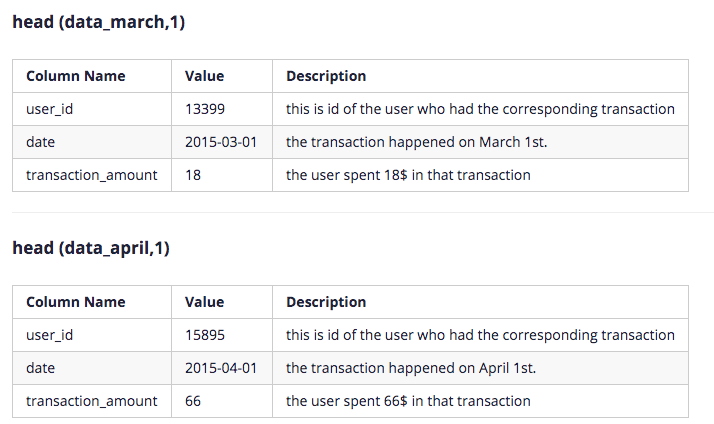

In [56]:
print(f"Excercise: https://product-data-science.datamasked.com/courses/496549/lectures/9147607")

## get dataset and fix unix
ex_four_march = pd.read_csv(folder + '/query_four_march.csv')
ex_four_april = pd.read_csv(folder + '/query_four_april.csv')

print(f"ex_three shape : {len(ex_four_march)}")
print(f"ex_three shape : {len(ex_four_april)}")

## upload the dataset to GBQ
table_id = 'sql_practice.ex_four_march'
pandas_gbq.to_gbq(ex_four_march, table_id, project_id=project_id)

table_id = 'sql_practice.ex_four_april'
pandas_gbq.to_gbq(ex_four_april, table_id, project_id=project_id)

print('')
print('Requirements: Write a query that returns the total amount of money spent by each user. That is,\
the sum of the column transaction_amount for each user over both tables.Write a query that returns day by day\
the cumulative sum of money spent by each user. That is, each day a user had a transcation, we should have\
how much money she has spent in total until that day. Obviously, the last day cumulative sum should match the\
numbers from the previous bullet point.')

Image(filename=folder + '/query_four_table.png')


In [57]:
#### Query 1 - total by user; would then need to sum march and april through another subquery
"""
SELECT user_table.user_id
,SUM(m.transaction_amount) as march_amount 
,SUM(a.transaction_amount) as april_amount 
FROM (SELECT user_id FROM sql_practice.ex_four_march
      UNION   
      SELECT user_id FROM sql_practice.ex_four_april) user_table 
LEFT JOIN sql_practice.ex_four_march m 
ON user_table.user_id = m.user_id
LEFT JOIN sql_practice.ex_four_april a
ON user_table.user_id = a.user_id 
GROUP BY 1 
"""


#### Query 2 - cumulative amount by user 

"""
CREATE TABLE sql_practice.users AS 
SELECT DISTINCT user_id FROM (

SELECT user_id 
    FROM sql_practice.ex_four_march
    UNION ALL    
SELECT user_id FROM sql_practice.ex_four_april); 


CREATE TABLE sql_practice.dates AS 
SELECT DISTINCT date FROM (

SELECT date
    FROM sql_practice.ex_four_march
    UNION ALL    
SELECT date FROM sql_practice.ex_four_april);


CREATE TABLE sql_practice.cross_join AS 
SELECT user_id, date 
FROM sql_practice.users
CROSS JOIN sql_practice.dates; 


SELECT c.*
,COALESCE(m.transaction_amount, a.transaction_amount, 0) as daily_txn_amount
,SUM(daily_txn_amount) OVER (PARTITION BY user_id ORDER BY date ASC) as cum_txn_amount 

FROM sql_practice.cross_join c
LEFT JOIN sql_practice.ex_four_march m
ON c.user_id = m.user_id 
AND c.date = m.date
LEFT JOIN sql_practice.ex_four_april a
ON c.user_id = a.user_id
AND c.date = a.date
ORDER BY 1,2

"""

SyntaxError: invalid syntax (<ipython-input-57-db6ffb829e81>, line 16)

### Exercise Five 

Excercise: https://product-data-science.datamasked.com/courses/496549/lectures/9147612
query_five_transactions shape : 11975
query_five_users shape : 1982


1it [00:04,  4.46s/it]
1it [00:03,  3.83s/it]


Requirements: Find the average and median transaction amount only considering those transactions that happen on the same date as that user signed-up.


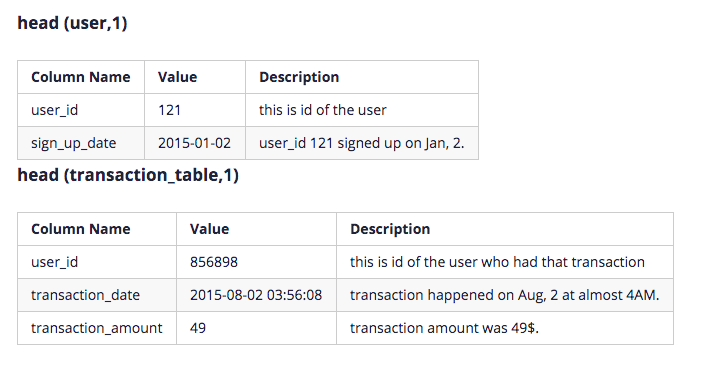

In [58]:
    
print(f"Excercise: https://product-data-science.datamasked.com/courses/496549/lectures/9147612")

## get dataset and fix unix
query_five_transactions = pd.read_csv(folder + '/query_five_transactions.csv')
query_five_users = pd.read_csv(folder + '/query_five_users.csv')

print(f"query_five_transactions shape : {len(query_five_transactions)}")
print(f"query_five_users shape : {len(query_five_users)}")

## upload the dataset to GBQ
table_id = 'sql_practice.ex_five_transactions'
pandas_gbq.to_gbq(query_five_transactions, table_id, project_id=project_id)

table_id = 'sql_practice.ex_five_users'
pandas_gbq.to_gbq(query_five_users, table_id, project_id=project_id)

print('')
print('Requirements: Find the average and median transaction amount only considering those transactions \
that happen on the same date as that user signed-up.')

Image(filename=folder + '/query_five_table.png')


In [ ]:


### median sometimes needs to be done as a window function; could do 

### MEDIAN (transaction_amount) OVER (PARTITION BY user_id ORDER BY DATE ASC) as median_amount 
### or maybe NTILE 

"""
SELECT 
user_id 
,AVG(transaction_amount) as avg_amount
,MEDIAN(transaction_amount) as median_amount 
    SELECT 
    user_id
    ,transaction_amount
        FROM sql_practice.query_five_users u 
        INNER JOIN sql_practice.query_five_transactions t 
            ON u.user_id = t.user_id 
            AND u.sign_up_date = t.transaction_date 
    GROUP BY 1
"""


### Exercise Six 

Excercise: https://product-data-science.datamasked.com/courses/496549/lectures/9147651
query_six shape : 58727


1it [00:07,  7.24s/it]


Requirements: The country with the largest and smallest number of users. A query that returns for eachcountry the first and the last user who signed up (if that country has just one user, it should just returnthat single user


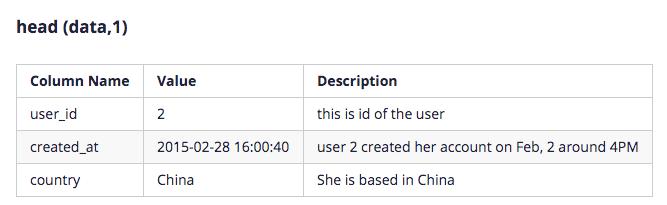

In [60]:
    
print(f"Excercise: https://product-data-science.datamasked.com/courses/496549/lectures/9147651")

## get dataset and fix unix
query_six = pd.read_csv(folder + '/query_six.csv')


print(f"query_six shape : {len(query_six)}")

## upload the dataset to GBQ
table_id = 'sql_practice.ex_six'
pandas_gbq.to_gbq(query_six, table_id, project_id=project_id)


print('')
print('Requirements: The country with the largest and smallest number of users. A query that returns for each\
country the first and the last user who signed up (if that country has just one user, it should just return\
that single user')

Image(filename=folder + '/query_six_table.png')

In [ ]:
### Query one: Select country and count of users - most and least 

CREATE TABLE sql_practice.country_count AS 
SELECT country, COUNT(DISTINCT user_id) as count_users 
FROM sql_practice.ex_six
GROUP BY 1; 


SELECT 'most users' as type, country, count_users 
FROM sql_practice.country_count 
ORDER BY count_users DESC 
LIMIT 1 

UNION ALL 

SELECT 'least users' as type, country, count_users 
FROM sql_practice.country_count 
ORDER BY count_users ASC 
LIMIT 1 

###



### Given the following tables how would you know who has the most friends: 
REQUESTS date | sender_id | accepter_id 
ACCEPTED accepted_at | accepter_id | sender_id  16 Answers

In [17]:


### My own tables for practice 
accepted_df=pd.DataFrame(columns = ['date', 'sender_id', 'accepter_id'])
accepted_df.loc[0] = ['10/10/2020', 1, 2]
accepted_df.loc[1] = ['10/10/2020', 1, 3]
accepted_df.loc[2] = ['10/10/2020', 5, 100]

## upload the dataset to GBQ
table_id = 'sql_practice.accepted'
pandas_gbq.to_gbq(accepted_df, table_id, project_id=project_id, if_exists = 'append')



requests_df=pd.DataFrame(columns = ['date', 'accepter_id','sender_id'])
requests_df.loc[0] = ['10/10/2020', 1, 4]
requests_df.loc[1] = ['10/10/2020', 8, 9]
requests_df.loc[2] = ['10/10/2020', 3, 1]
requests_df.loc[2] = ['10/10/2020', 2, 1]

## upload the dataset to GBQ
table_id = 'sql_practice.requests'
pandas_gbq.to_gbq(requests_df, table_id, project_id=project_id, if_exists = 'append')

TableCreationError: Could not create the table because it already exists. Change the if_exists parameter to 'append' or 'replace' data.

### Provided a table with page_id, event timestamp and a flag for a state (which is on/off), find the number of pages that are currently on.  

In [52]:

status_table=pd.DataFrame()


## Random Dates between two given dates 

def random_dates(start, end, n=1000):

    start_u = start.value//10**9
    end_u = end.value//10**9

    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit='s')

start = pd.to_datetime('2015-01-01')
end = pd.to_datetime('2020-07-08')

### 
status_table['event_timestamp'] = random_dates(start, end).values
status_table['page_id'] = pd.Series(np.random.randint(0, 10, size=1000)).values
status_table['flag'] = np.random.choice(['on', 'off'],1000)


## upload the dataset to GBQ
table_id = 'sql_practice.status_table'
pandas_gbq.to_gbq(status_table, table_id, project_id=project_id, if_exists = 'append')



1it [00:04,  4.54s/it]
